## Advanced Data Analysis with Machine Learning

Mukadder Cinar


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
from sklearn.model_selection import train_test_split

## NYC Citywide Annualized Calender Sales Update
Annualized sales information of properties sold in New York City


Each row is an Annual Sales Information for Properties Sold in New York City.





https://data.cityofnewyork.us/City-Government/NYC-Citywide-Annualized-Calendar-Sales-Update/w2pb-icbu

description of the columns:

https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf

In [64]:
df = pd.read_csv("/Users/mukaddercinar/Downloads/NYC_Citywide_Annualized_Calendar_Sales_Update-2.csv")
df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL,BLOCK,LOT,EASE-MENT,BUILDING CLASS AS OF FINAL ROLL,ADDRESS,APARTMENT NUMBER,...,SALE PRICE,SALE DATE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1,FINANCIAL,14 RENTALS - 4-10 UNIT,2A,7,38,NaN,S9,60 PEARL STREET,NaN,...,4027000,01/01/2016,40.703553,-74.011152,101.0,1.0,9.0,1000014.0,1.000070e+09,Battery Park City-Lower Manhattan
1,1,HARLEM-EAST,01 ONE FAMILY DWELLINGS,1,1643,122,NaN,A4,155 EAST 115 STREET,NaN,...,0,01/01/2016,40.797761,-73.941667,111.0,8.0,182.0,1052276.0,1.016430e+09,East Harlem North
2,1,HARLEM-EAST,07 RENTALS - WALKUP APARTMENTS,2,1643,123,NaN,C5,157 EAST 115 STREET,NaN,...,0,01/01/2016,40.797744,-73.941627,111.0,8.0,182.0,1052277.0,1.016430e+09,East Harlem North
3,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,2,1320,4247,NaN,R4,211 EAST 46TH STREET,33J,...,0,01/01/2016,40.753118,-73.972085,106.0,4.0,90.0,1037599.0,1.013208e+09,Turtle Bay-East Midtown
4,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,2,1365,1526,NaN,R4,400 EAST 54TH STREET,30H,...,0,01/01/2016,40.756237,-73.963995,106.0,4.0,8603.0,1076281.0,1.013658e+09,Turtle Bay-East Midtown


In [49]:
df.shape

(345059, 29)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345059 entries, 0 to 345058
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BOROUGH                          345059 non-null  int64  
 1   NEIGHBORHOOD                     345059 non-null  object 
 2   BUILDING CLASS CATEGORY          345059 non-null  object 
 3   TAX CLASS AS OF FINAL ROLL       341199 non-null  object 
 4   BLOCK                            345059 non-null  int64  
 5   LOT                              345059 non-null  int64  
 6   EASE-MENT                        0 non-null       float64
 7   BUILDING CLASS AS OF FINAL ROLL  341199 non-null  object 
 8   ADDRESS                          345059 non-null  object 
 9   APARTMENT NUMBER                 74790 non-null   object 
 10  ZIP CODE                         345044 non-null  float64
 11  RESIDENTIAL UNITS                329081 non-null  float64
 12  CO

In [51]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AS OF FINAL ROLL', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AS OF FINAL ROLL', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Latitude', 'Longitude', 'Community Board',
       'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [52]:
#replace the white space in columns by an underscore
df.columns = df.columns.str.replace(' ', '_')

In [53]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AS_OF_FINAL_ROLL', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AS_OF_FINAL_ROLL', 'ADDRESS', 'APARTMENT_NUMBER',
       'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE', 'Latitude', 'Longitude', 'Community_Board',
       'Council_District', 'Census_Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [54]:
# switching the column names to lowercase
df.columns = map(str.lower, df.columns)

In [55]:
df.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_as_of_final_roll', 'block', 'lot', 'ease-ment',
       'building_class_as_of_final_roll', 'address', 'apartment_number',
       'zip_code', 'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date', 'latitude', 'longitude', 'community_board',
       'council_district', 'census_tract', 'bin', 'bbl', 'nta'],
      dtype='object')

In [56]:
# drop the columns that have a lot of missing values
df1 = df.drop(columns = ["ease-ment","apartment_number"])
df1.head(3)

,borough,neighborhood,building_class_category,tax_class_as_of_final_roll,block,lot,building_class_as_of_final_roll,address,zip_code,residential_units,...,sale_price,sale_date,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
0,1,FINANCIAL,14 RENTALS - 4-10 UNIT,2A,7,38,S9,60 PEARL STREET,10004.0,3.0,...,4027000,01/01/2016,40.703553,-74.011152,101.0,1.0,9.0,1000014.0,1.000070e+09,Battery Park City-Lower Manhattan
1,1,HARLEM-EAST,01 ONE FAMILY DWELLINGS,1,1643,122,A4,155 EAST 115 STREET,10029.0,1.0,...,0,01/01/2016,40.797761,-73.941667,111.0,8.0,182.0,1052276.0,1.016430e+09,East Harlem North
2,1,HARLEM-EAST,07 RENTALS - WALKUP APARTMENTS,2,1643,123,C5,157 EAST 115 STREET,10029.0,12.0,...,0,01/01/2016,40.797744,-73.941627,111.0,8.0,182.0,1052277.0,1.016430e+09,East Harlem North


In [57]:
df1.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_as_of_final_roll', 'block', 'lot',
       'building_class_as_of_final_roll', 'address', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date', 'latitude', 'longitude', 'community_board',
       'council_district', 'census_tract', 'bin', 'bbl', 'nta'],
      dtype='object')

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345059 entries, 0 to 345058
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   borough                          345059 non-null  int64  
 1   neighborhood                     345059 non-null  object 
 2   building_class_category          345059 non-null  object 
 3   tax_class_as_of_final_roll       341199 non-null  object 
 4   block                            345059 non-null  int64  
 5   lot                              345059 non-null  int64  
 6   building_class_as_of_final_roll  341199 non-null  object 
 7   address                          345059 non-null  object 
 8   zip_code                         345044 non-null  float64
 9   residential_units                329081 non-null  float64
 10  commercial_units                 329081 non-null  float64
 11  total_units                      329081 non-null  float64
 12  la

In [59]:
df2 = df1.dropna() #drop the rows that have missing values

In [90]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309443 entries, 0 to 345058
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   borough                          309443 non-null  int64  
 1   neighborhood                     309443 non-null  object 
 2   building_class_category          309443 non-null  object 
 3   tax_class_as_of_final_roll       309443 non-null  object 
 4   block                            309443 non-null  int64  
 5   lot                              309443 non-null  int64  
 6   building_class_as_of_final_roll  309443 non-null  object 
 7   address                          309443 non-null  object 
 8   zip_code                         309443 non-null  float64
 9   residential_units                309443 non-null  float64
 10  commercial_units                 309443 non-null  float64
 11  total_units                      309443 non-null  float64
 12  la

(309443, 27)

In [62]:
df2.describe()

,borough,block,lot,zip_code,residential_units,commercial_units,total_units,year_built,tax_class_at_time_of_sale,sale_price,latitude,longitude,community_board,council_district,census_tract,bin,bbl
count,309443.000000,309443.000000,309443.000000,309443.000000,309443.000000,309443.000000,309443.000000,309443.000000,309443.000000,3.094430e+05,309443.000000,309443.000000,309443.000000,309443.000000,309443.000000,3.094430e+05,3.094430e+05
mean,3.041374,4379.971255,355.403018,10851.464690,2.062170,0.231571,2.331955,1844.810311,1.606545,1.156740e+06,40.706038,-73.930453,311.578562,27.241602,9776.591986,3.189619e+06,3.079879e+09
std,1.277214,3634.684353,641.843317,695.417122,14.077898,7.077518,15.861687,441.430102,0.818519,1.256284e+07,0.080641,0.105252,127.472656,15.653743,26568.301985,1.329697e+06,1.298009e+09
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,40.498924,-74.254897,101.000000,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,2.000000,1347.000000,22.000000,10307.000000,1.000000,0.000000,1.000000,1920.000000,1.000000,0.000000e+00,40.643770,-73.984321,210.000000,13.000000,152.000000,2.066501e+06,2.043408e+09
50%,3.000000,3471.000000,50.000000,11211.000000,1.000000,0.000000,1.000000,1940.000000,1.000000,4.200000e+05,40.709273,-73.941731,314.000000,28.000000,401.000000,3.244438e+06,3.065808e+09
75%,4.000000,6501.000000,311.000000,11358.000000,2.000000,0.000000,2.000000,1970.000000,2.000000,8.300000e+05,40.760245,-73.854658,409.000000,41.000000,1120.000000,4.220936e+06,4.073060e+09
max,5.000000,16350.000000,9133.000000,11697.000000,2229.000000,2261.000000,2261.000000,2020.000000,4.000000,2.397502e+09,40.912869,-73.700376,503.000000,51.000000,157903.000000,5.516445e+06,5.080500e+09


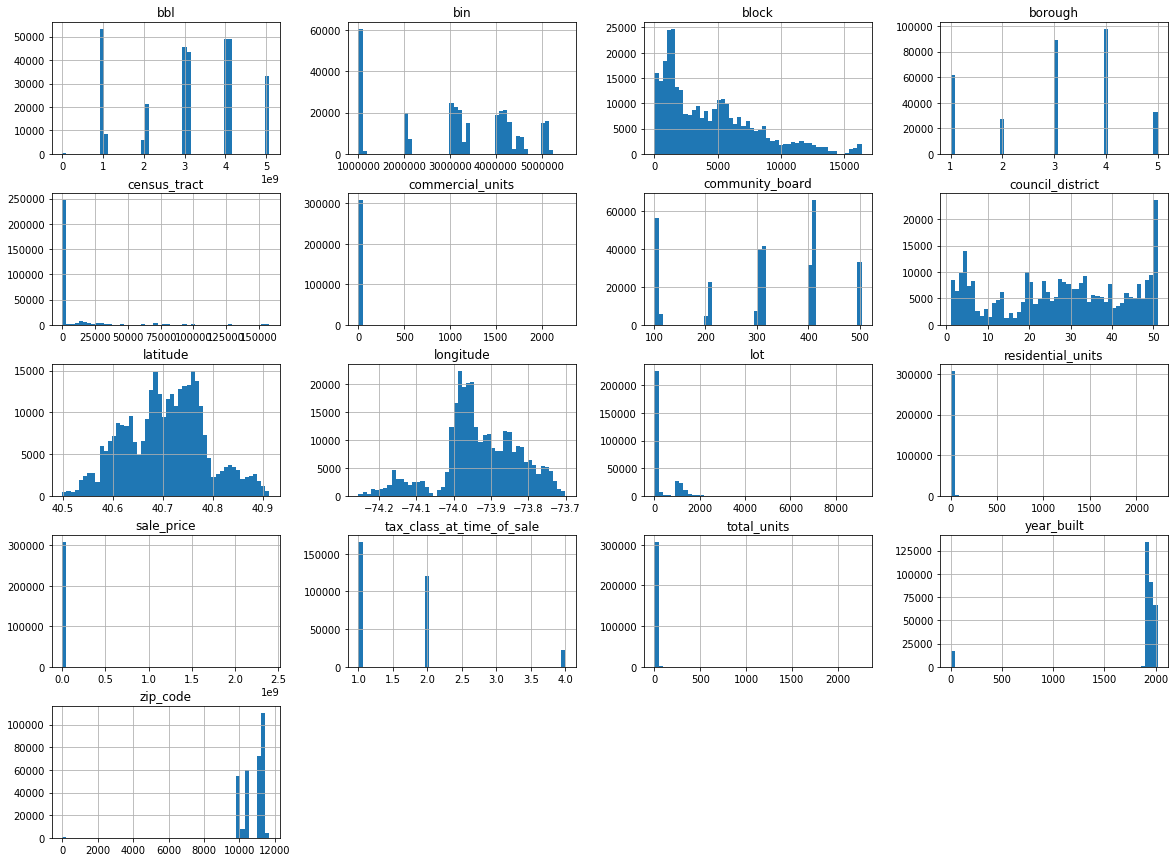

In [67]:
df2.hist(bins=50, figsize = (20, 15))
plt.show()

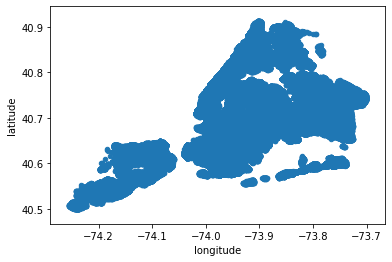

In [68]:
df2.plot(kind = "scatter", x = 'longitude', y = 'latitude')

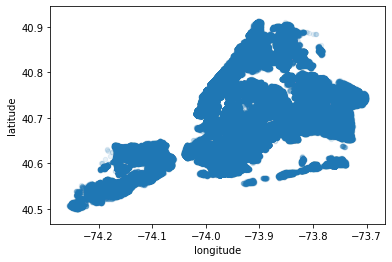

In [77]:
df2.plot(kind = "scatter", x = 'longitude', y = 'latitude', alpha = 0.1)

In [78]:
corr_matrix = df2.corr()

In [79]:
corr_matrix["sale_price"].sort_values(ascending=False)

sale_price                   1.000000
total_units                  0.143949
residential_units            0.121021
tax_class_at_time_of_sale    0.086924
commercial_units             0.081613
latitude                     0.027307
lot                          0.008853
year_built                   0.001950
census_tract                -0.015687
longitude                   -0.022903
zip_code                    -0.046047
block                       -0.048916
council_district            -0.061410
borough                     -0.068259
bbl                         -0.068651
bin                         -0.068856
community_board             -0.069452
Name: sale_price, dtype: float64

In [82]:
y = df2.sale_price
x = df2.drop("sale_price", axis = 1) 

In [86]:
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size = 0.2)

In [87]:
x_train.head()

,borough,neighborhood,building_class_category,tax_class_as_of_final_roll,block,lot,building_class_as_of_final_roll,address,zip_code,residential_units,...,building_class_at_time_of_sale,sale_date,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
42752,1,LOWER EAST SIDE,10 COOPS - ELEVATOR APARTMENTS,2,311,13,D4,"212 EAST BROADWAY, G104",10002.0,0.0,...,D4,06/24/2016,40.714285,-73.987591,103.0,1.0,1401.0,1077607.0,1.003110e+09,Lower East Side
204705,4,SPRINGFIELD GARDENS,02 TWO FAMILY DWELLINGS,1,13051,40,B3,141-31 181ST STREET,11413.0,2.0,...,B3,04/27/2018,40.670479,-73.762645,412.0,31.0,330.0,4280706.0,4.130510e+09,Springfield Gardens North
291277,3,BOROUGH PARK,02 TWO FAMILY DWELLINGS,1,5461,12,B2,1818 50TH STREET,11204.0,2.0,...,B2,03/03/2019,40.627398,-73.981011,312.0,44.0,474.0,3129470.0,3.054610e+09,Borough Park
139580,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6360,1,B2,639 BARCLAY AVENUE,10312.0,2.0,...,B2,07/26/2017,40.527169,-74.167450,503.0,51.0,176.0,5131948.0,5.063600e+09,Annadale-Huguenot-Prince's Bay-Eltingville
28624,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,646,58,C0,32-48 36TH STREET,11106.0,3.0,...,C0,04/28/2016,40.759688,-73.921742,401.0,22.0,59.0,4009704.0,4.006460e+09,Astoria


In [89]:
x_train.shape

(247554, 26)

### Transformation of Categorical Attributes



In [131]:
df2.agg(['count', 'nunique'])

,borough,neighborhood,building_class_category,tax_class_as_of_final_roll,block,lot,building_class_as_of_final_roll,address,zip_code,residential_units,...,sale_price,sale_date,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
count,309443,309443,309443,309443,309443,309443,309443,309443,309443,309443,...,309443,309443,309443,309443,309443,309443,309443,309443,309443,309443
nunique,5,260,90,10,13199,4137,185,240526,191,280,...,25219,1459,129861,137279,62,51,1292,171876,167171,192


In [132]:
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder

In [105]:
df2["borough"].value_counts() # "borough" is a catagorical attribute.

4    97905
3    89236
1    61977
5    33059
2    27266
Name: borough, dtype: int64

In [110]:
borough_ctg = df2['borough'].values.reshape(-1,1)
ctg_encoder = OneHotEncoder()
ctg_encoder_1hot = ctg_encoder.fit_transform(borough_ctg)
ctg_encoder_1hot

<309443x5 sparse matrix of type '<class 'numpy.float64'>'
	with 309443 stored elements in Compressed Sparse Row format>

In [111]:
ctg_encoder_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [93]:
df2['nta'].value_counts()

Upper West Side                               5330
Turtle Bay-East Midtown                       4892
Forest Hills                                  4387
Hudson Yards-Chelsea-Flatiron-Union Square    4342
Flushing                                      4290
                                              ... 
Starrett City                                   30
park-cemetery-etc-Queens                        16
park-cemetery-etc-Bronx                          3
Stuyvesant Town-Cooper Village                   2
Airport                                          1
Name: nta, Length: 192, dtype: int64

In [108]:
nta = df2['nta'].values.reshape(-1,1)
nta_encoder = OneHotEncoder()
nta_encoder_1hot = nta_encoder.fit_transform(nta)
nta_encoder_1hot

<309443x192 sparse matrix of type '<class 'numpy.float64'>'
	with 309443 stored elements in Compressed Sparse Row format>

In [109]:
nta_encoder_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
df2['building_class_category'].value_counts()

01 ONE FAMILY DWELLINGS                56753
02 TWO FAMILY DWELLINGS                48438
13 CONDOS - ELEVATOR APARTMENTS        32481
10 COOPS - ELEVATOR APARTMENTS         25998
01  ONE FAMILY DWELLINGS               18341
                                       ...  
36  OUTDOOR RECREATIONAL FACILITIES       11
40 SELECTED GOVERNMENTAL FACILITIES        4
39  TRANSPORTATION FACILITIES              3
39 TRANSPORTATION FACILITIES               3
11  SPECIAL CONDO BILLING LOTS             2
Name: building_class_category, Length: 90, dtype: int64

In [102]:

building_ctgory = df2['building_class_category'].values.reshape(-1,1)
ctgory_encoder = OneHotEncoder()
building_ctgory_1hot = ctgory_encoder.fit_transform(building_ctgory)
building_ctgory_1hot

<309443x90 sparse matrix of type '<class 'numpy.float64'>'
	with 309443 stored elements in Compressed Sparse Row format>

In [103]:
building_ctgory_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Applying binning to a continues attribute


In [112]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(df2['sale_price'].values.reshape(-1,1))
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([0.00000000e+00, 2.39750190e+08, 4.79500380e+08, 7.19250570e+08,
       9.59000760e+08, 1.19875095e+09, 1.43850114e+09, 1.67825133e+09,
       1.91800152e+09, 2.15775171e+09, 2.39750190e+09])]


In [113]:
binned = kb.transform(df2['sale_price'].values.reshape(-1,1))
binned

<309443x10 sparse matrix of type '<class 'numpy.float64'>'
	with 309443 stored elements in Compressed Sparse Row format>

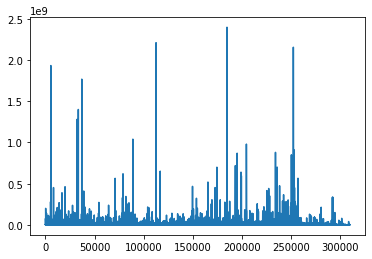

In [114]:
plt.plot(df2['sale_price'].values.reshape(-1,1))
plt.show()

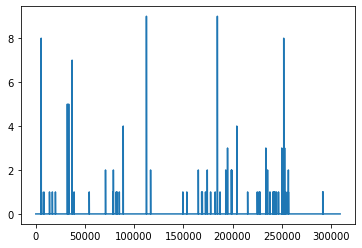

In [115]:
plt.plot(binned.argmax(1))
plt.show()

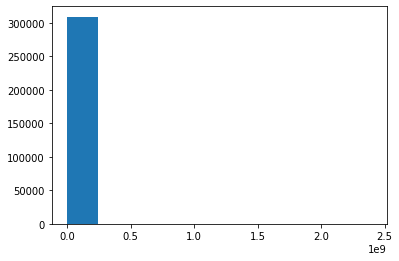

In [117]:
plt.hist(df2['sale_price'].values.reshape(-1,1), bins = 10)
plt.show()

### Applying the following transformations to the sales_price 

- Squaring (**2)

- Cubing (**3)

- np.log

- np.exp

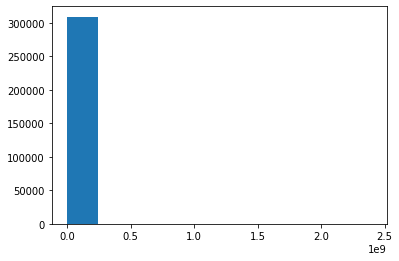

In [119]:
plt.hist(df2['sale_price'].values.reshape(-1,1))
plt.show()

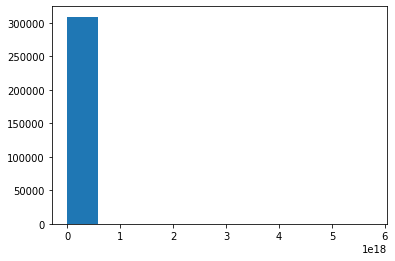

In [120]:
plt.hist(df2['sale_price'].values.reshape(-1,1)**2, bins = 10)
plt.show()

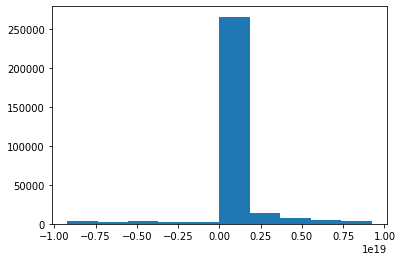

In [121]:
plt.hist(df2['sale_price'].values.reshape(-1,1)**3, bins = 10)
plt.show()

/Users/mukaddercinar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


ValueError: supplied range of [1.0, inf] is not finite

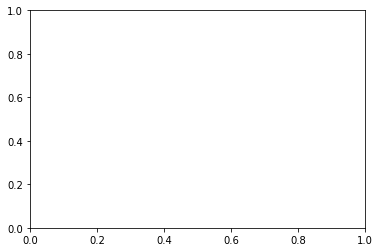

In [133]:
plt.hist(np.exp(df2['sale_price'].values.reshape(-1,1)), bins=10) # There are some sale price that is zero.
plt.show()

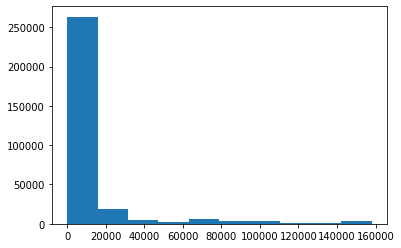

In [126]:
plt.hist(df2['census_tract'].values.reshape(-1,1))
plt.show()

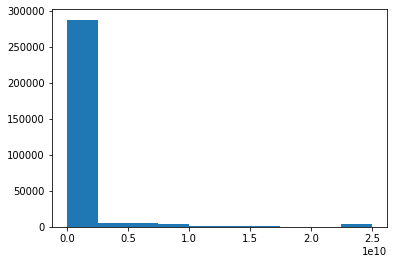

In [127]:
plt.hist(df2['census_tract'].values.reshape(-1,1)**2, bins = 10)
plt.show()

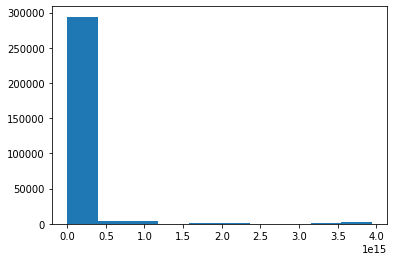

In [128]:
plt.hist(df2['census_tract'].values.reshape(-1,1)**3, bins = 10)
plt.show()

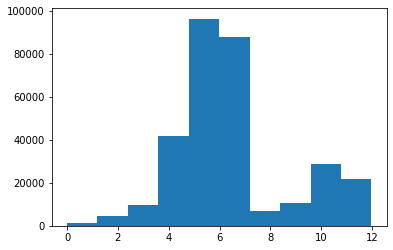

In [129]:
plt.hist(np.log(df2['census_tract'].values.reshape(-1,1)), bins=10)
plt.show()

/Users/mukaddercinar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


ValueError: supplied range of [2.718281828459045, inf] is not finite

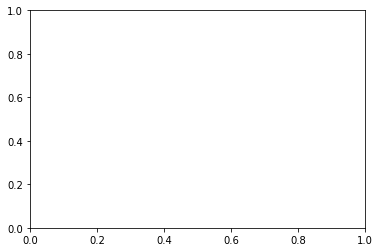

In [130]:
plt.hist(np.exp(df2['census_tract'].values.reshape(-1,1)), bins = 10)
plt.show()